In [1]:
import os
import pandas as pd

DATA_PATH = "datasets/human_resource_analytics"

def load_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "HR_comma_sep.csv")
    return pd.read_csv(csv_path)

hra = load_data()
hra

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [2]:
hra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
hra["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [4]:
hra["sales"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [5]:
hra.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


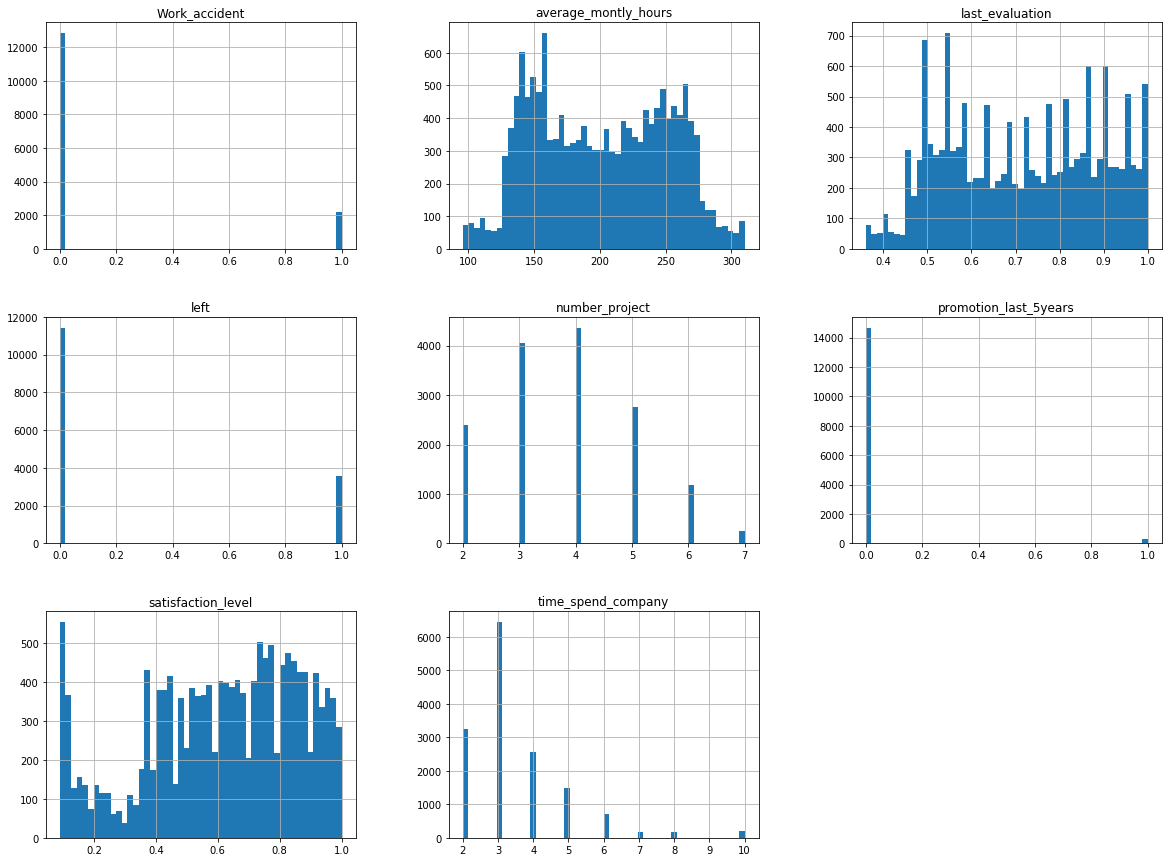

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
hra.hist(bins=50, figsize=(20, 15))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(hra, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

11999 train + 3000 test


In [9]:
import numpy as np

hra["satisfaction_cat"] = np.ceil(hra["satisfaction_level"] * 10) / 10

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(hra, hra["satisfaction_cat"]):
    strat_train_set = hra.loc[train_index]
    strat_test_set = hra.loc[test_index]

In [11]:
print(len(strat_train_set), "train +", len(strat_test_set), "test")

11999 train + 3000 test


In [12]:
strat_train_set["satisfaction_cat"].value_counts() / len(strat_train_set)

0.8    0.153096
0.9    0.147846
0.7    0.131511
0.6    0.127844
1.0    0.118927
0.5    0.112509
0.4    0.078840
0.2    0.061672
0.1    0.036836
0.3    0.030919
Name: satisfaction_cat, dtype: float64

In [13]:
strat_test_set["satisfaction_cat"].value_counts() / len(strat_test_set)

0.8    0.153000
0.9    0.148000
0.7    0.131333
0.6    0.127667
1.0    0.119000
0.5    0.112667
0.4    0.079000
0.2    0.061667
0.1    0.037000
0.3    0.030667
Name: satisfaction_cat, dtype: float64

In [14]:
for set in (strat_train_set, strat_test_set):
    set.drop(["satisfaction_cat"], axis=1, inplace=True)

In [15]:
hra = strat_train_set

In [16]:
corr_matrix = hra.corr()
corr_matrix["left"].sort_values(ascending=False)

left                     1.000000
time_spend_company       0.138456
average_montly_hours     0.070778
number_project           0.017899
last_evaluation          0.005047
promotion_last_5years   -0.058353
Work_accident           -0.149983
satisfaction_level      -0.385742
Name: left, dtype: float64

There is a negative correctly between an employee who leaves and how satisfied they are. This makes sense. Disatisfied employees are likely to leave.

Here are the likely predictors: low satisfaction level, work accidents, time spent at the company, work hours.

/home/ashley/ml/env/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5bd1da828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff5b305fd68>]], dtype=object)

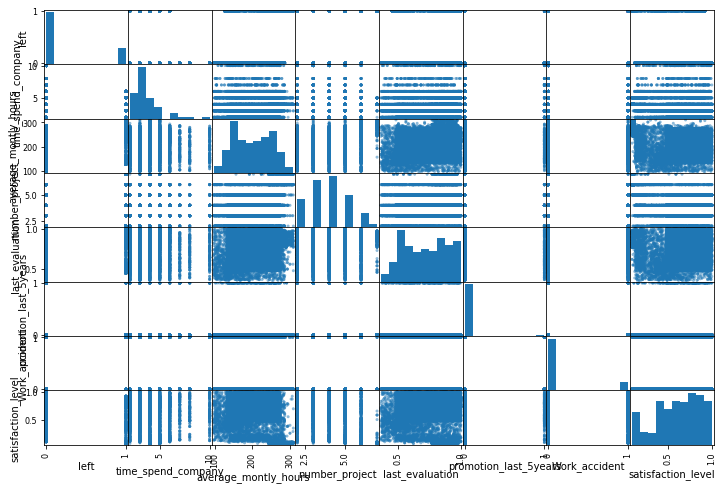

In [17]:
from pandas.tools.plotting import scatter_matrix

attributes = ["left", "time_spend_company", "average_montly_hours", "number_project", "last_evaluation", "promotion_last_5years", "Work_accident", "satisfaction_level"]
scatter_matrix(hra[attributes], figsize=(12, 8))

In [19]:
hra = strat_train_set.drop("left", axis=1)
hra_labels = strat_train_set["left"].copy()

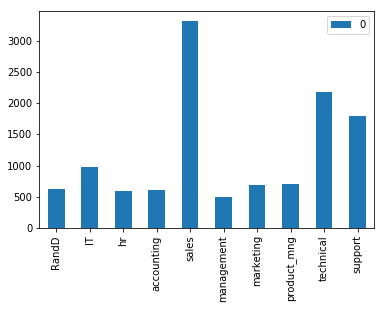

In [20]:
import pandas
from collections import Counter

department_counts = Counter(hra["sales"])
df = pandas.DataFrame.from_dict(department_counts, orient='index')

df.plot(kind='bar')

deparments ['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']


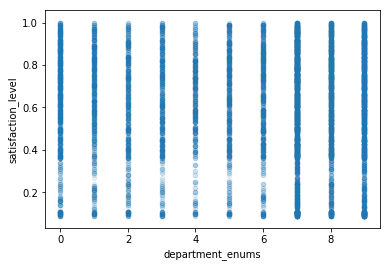

In [27]:
# attribution: http://stackoverflow.com/a/22097018/137996
deparments, department_enums = np.unique(hra["sales"], return_inverse=True)
print("deparments", deparments)
#hra["department_enums"] = department_enums
hra.plot(kind="scatter", x="department_enums", y="satisfaction_level", alpha=0.1)

salary ['high' 'low' 'medium']


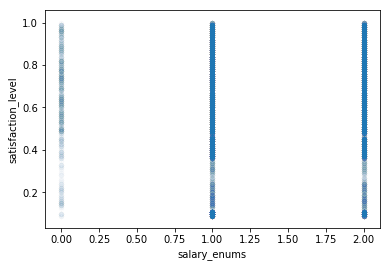

In [29]:
# attribution: http://stackoverflow.com/a/22097018/137996
salary, salary_enums = np.unique(hra["salary"], return_inverse=True)
print("salary", salary)
#hra["salary_enums"] = salary_enums
hra.plot(kind="scatter", x="salary_enums", y="satisfaction_level", alpha=0.01)

In [35]:
hra = hra.drop("salary_enums", axis=1).drop("department_enums", axis=1)

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
salary_cat = hra["salary"]
salary_cat_encoded = encoder.fit_transform(salary_cat)
salary_cat_encoded

array([2, 2, 2, ..., 0, 0, 2])

In [40]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
salary_cat_1hot = encoder.fit_transform(salary_cat)
salary_cat_1hot

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ..., 
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [47]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelBinarizer, Imputer

hra_numbers = hra.drop("salary", axis=1).drop("sales", axis=1)
num_attribs = list(hra_numbers)

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

salary_pipeline = Pipeline([
    ('selector', DataFrameSelector(["salary"])),
    ('label_binarizer', LabelBinarizer())
])

department_pipeline = Pipeline([
    ('selector', DataFrameSelector(["sales"])),
    ('label_binarizer', LabelBinarizer())
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("salary_pipeline", salary_pipeline),
    ("department_pipeline", department_pipeline),
])

hra_prepared = full_pipeline.fit_transform(hra)
hra_prepared.shape

(11999, 20)

In [58]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(hra_prepared, hra_labels)

def test_some_data(model):
    some_data = hra.iloc[:5]
    some_labels = hra_labels.iloc[:5]
    some_data_prepared = full_pipeline.transform(some_data)
    print("Predictions:\t", model.predict(some_data_prepared))
    print("Labels:\t\t", list(some_labels))

test_some_data(lin_reg)

Predictions:	 [-0.21602495  0.36349141  0.02957407  0.52671899  0.18385429]
Labels:		 [0, 0, 0, 0, 0]


In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

def rmse(predictions):
    mse = mean_squared_error(hra_labels, predictions)
    return np.sqrt(mse)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(hra_prepared, hra_labels)

tree_hra_predictions = tree_reg.predict(hra_prepared)
rmse(tree_hra_predictions)

0.0

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, hra_prepared, hra_labels,
                        scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [52]:
display_scores(rmse_scores)

Scores: [ 0.14142136  0.13540064  0.15        0.13540064  0.15545632  0.16072751
  0.13844373  0.15        0.15275252  0.1581798 ]
Mean: 0.147778252584
Standard deviation: 0.00896324722704


In [54]:
lin_scores = cross_val_score(lin_reg, hra_prepared, hra_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 0.373989    0.36759118  0.38683486  0.36996198  0.38179789  0.38157024
  0.37502904  0.38608296  0.37224598  0.37352347]
Mean: 0.376862659026
Standard deviation: 0.00639249726316


In [56]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(hra_prepared, hra_labels)
forest_predictions = forest_reg.predict(hra_prepared)
rmse(forest_predictions)

0.04884702825502741

In [57]:
forest_scores = cross_val_score(forest_reg, hra_prepared, hra_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 0.12409674  0.10503968  0.11049133  0.11640447  0.11361485  0.12399597
  0.11492751  0.12006942  0.11398099  0.14062294]
Mean: 0.118324389405
Standard deviation: 0.00927290531908


In [59]:
test_some_data(forest_reg)

Predictions:	 [ 0.   0.   0.   0.   0.1]
Labels:		 [0, 0, 0, 0, 0]


In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}
]

grid_search_one = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search_one.fit(hra_prepared, hra_labels)
grid_search_one.best_params_

{'max_features': 8, 'n_estimators': 30}

In [62]:
param_grid = [
    {"n_estimators": [30, 60, 120, 240], 'max_features': [6, 7, 8]}
]

grid_search_two = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search_two.fit(hra_prepared, hra_labels)
grid_search_two.best_params_

{'max_features': 8, 'n_estimators': 120}

In [67]:
param_grid = [
    {"n_estimators": range(122, 130), 'max_features': [8]}
]

grid_search_three = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search_three.fit(hra_prepared, hra_labels)
grid_search_three.best_params_

{'max_features': 8, 'n_estimators': 128}

In [70]:
def cross_val_scores(regressor):
    scores = cross_val_score(regressor, hra_prepared, hra_labels, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    display_scores(rmse_scores)
    return rmse_scores

In [71]:
cross_val_scores(grid_search_three.best_estimator_)

Scores: [ 0.10220848  0.09155081  0.0946052   0.1049156   0.09791788  0.11107473
  0.09159219  0.10984784  0.10422833  0.12271091]
Mean: 0.103065199249
Standard deviation: 0.00929461824589


array([ 0.10220848,  0.09155081,  0.0946052 ,  0.1049156 ,  0.09791788,
        0.11107473,  0.09159219,  0.10984784,  0.10422833,  0.12271091])

In [75]:
from sklearn.preprocessing import LabelBinarizer
salary_encoder = LabelBinarizer()
salary_1hot = salary_encoder.fit_transform(hra["salary"])
salary_1hot

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ..., 
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [76]:
from sklearn.preprocessing import LabelBinarizer
department_encoder = LabelBinarizer()
department_1hot = department_encoder.fit_transform(hra["sales"])
department_1hot

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [79]:
feature_importances = grid_search_three.best_estimator_.feature_importances_
print(feature_importances)

attributes = num_attribs + list(salary_encoder.classes_) + list(department_encoder.classes_)
sorted(zip(feature_importances, attributes), reverse=True)

[ 0.36632578  0.10801637  0.18225118  0.13115828  0.18144386  0.00447269
  0.00096866  0.00249456  0.00419252  0.00284044  0.00140609  0.00106649
  0.00131739  0.00129085  0.00116226  0.00103351  0.00040685  0.00273876
  0.00237614  0.00303732]


[(0.36632577832965624, 'satisfaction_level'),
 (0.18225118386523437, 'number_project'),
 (0.18144386428311704, 'time_spend_company'),
 (0.13115827682729159, 'average_montly_hours'),
 (0.1080163682332146, 'last_evaluation'),
 (0.0044726912019306727, 'Work_accident'),
 (0.0041925240785345742, 'low'),
 (0.0030373153147303235, 'technical'),
 (0.0028404376434753792, 'medium'),
 (0.0027387573896715078, 'sales'),
 (0.0024945602851201357, 'high'),
 (0.0023761355749599695, 'support'),
 (0.0014060890238878627, 'IT'),
 (0.0013173937482262581, 'accounting'),
 (0.0012908483460739714, 'hr'),
 (0.0011622623657006927, 'management'),
 (0.001066493630468613, 'RandD'),
 (0.00103351081918587, 'marketing'),
 (0.00096866129519588445, 'promotion_last_5years'),
 (0.00040684774432450275, 'product_mng')]

In [88]:
from sklearn.preprocessing import FunctionTransformer

def get_class_index(encoder, class_name):
    return encoder.classes_.tolist().index(class_name)

technical_index = get_class_index(department_encoder, "technical")
sales_index = get_class_index(department_encoder, "sales")
support_index = get_class_index(department_encoder, "support")

department_pipeline_two = Pipeline([
    ('selector', DataFrameSelector(["sales"])),
    ('label_binarizer', LabelBinarizer()),
    ('output_selector', FunctionTransformer(lambda X: X[:,[technical_index, sales_index, support_index]])),
])

full_pipeline_two = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("salary_pipeline", salary_pipeline),
    ("department_pipeline", department_pipeline_two),
])

hra_prepared_two = full_pipeline_two.fit_transform(hra)

param_grid = [
    {"n_estimators": range(50, 111, 5), 'max_features': range(1, 9)}
]

grid_search_four = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search_four.fit(hra_prepared_two, hra_labels)
grid_search_four.best_params_

{'max_features': 5, 'n_estimators': 100}

In [89]:
def cross_val_scores(regressor, data=hra_prepared):
    scores = cross_val_score(regressor, data, hra_labels, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    display_scores(rmse_scores)
    return rmse_scores

cross_val_scores(forest_reg, hra_prepared_two)

Scores: [ 0.11796892  0.10630146  0.11269428  0.1113927   0.1123981   0.11711817
  0.11090537  0.11782756  0.11993054  0.13829053]
Mean: 0.116482761842
Standard deviation: 0.00826800355442


array([ 0.11796892,  0.10630146,  0.11269428,  0.1113927 ,  0.1123981 ,
        0.11711817,  0.11090537,  0.11782756,  0.11993054,  0.13829053])

In [90]:
best_search = grid_search_three
final_model = best_search.best_estimator_

X_test = strat_test_set.drop("left", axis=1)
y_test = strat_test_set["left"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.099476473840080654